# Comprehensions EXPERT

Esta tabla contiene la información de las comprehensiones.

## 1 - Obtencion de datos

In [26]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'comprehension__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('comprehensions')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-04 19:22:28.606277 Data cache files found ...
2024-07-04 19:22:28.609277 Data cache files successfully loaded!!
The dataset contains 4982 (27.29%) instances for BEGINNER class and 13277 (72.71%) for EXPERT class.


In [27]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'comprehensions'
TABLE_FEATURES = ['comprehension__category', 'comprehension__number_of_ifs', 'comprehension__number_of_generators', 'comprehension__is_async']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (13277, 4)
As we can see the downloaded data contains a total of 13277 instances. For each instance we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [28]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13277 entries, 4982 to 18258
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   comprehension__category              13277 non-null  object
 1   comprehension__number_of_ifs         13277 non-null  int64 
 2   comprehension__number_of_generators  13277 non-null  int64 
 3   comprehension__is_async              13277 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 427.9+ KB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas, 1 boleanas y 1 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [29]:
X.isnull().sum()

comprehension__category                0
comprehension__number_of_ifs           0
comprehension__number_of_generators    0
comprehension__is_async                0
dtype: int64

In [30]:
print_empty_cols(X)

comprehension__category
-----------------------
0 instancias no tienen un valor para la columna comprehension__category


comprehension__number_of_ifs
----------------------------
0 instancias no tienen un valor para la columna comprehension__number_of_ifs


comprehension__number_of_generators
-----------------------------------
0 instancias no tienen un valor para la columna comprehension__number_of_generators


comprehension__is_async
-----------------------
0 instancias no tienen un valor para la columna comprehension__is_async




### 2.2 - Describimos los valores de las variables de la tabla.

In [31]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
comprehension__category,13277,4,ListComprehension,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comprehension__number_of_ifs,13277.0,NaN,NaN,NaN,0.113881,0.317916,0.0,0.0,0.0,0.0,2.0
comprehension__number_of_generators,13277.0,NaN,NaN,NaN,1.013105,0.121418,1.0,1.0,1.0,1.0,4.0
comprehension__is_async,13277,2,False,13265,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [32]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "comprehension__number_of_ifs": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 2.0
    "comprehension__number_of_generators": [(0.0, 1.0), (1.0, 1.0), (1.0, inf)],  # min: 1.0 max: 4.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['comprehension__number_of_ifs'], 10))
print(get_statistics(X_copy, ['comprehension__number_of_generators'], 10))
print(get_statistics(full_table, ['comprehension__category'], 10))
print(get_statistics(X_copy, ['comprehension__is_async'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
comprehension__number_of_ifs  count  percentage
                   [0.0_0.0]  11766   88.619417
                   [0.0_inf]   1511   11.380583

comprehension__number_of_generators  count  percentage
                          [1.0_1.0]  13112   98.757249
                          [1.0_inf]    165    1.242751

comprehension__category  count  percentage
      ListComprehension   9436   71.070272
 GeneratorComprehension   2363   17.797695
      DictComprehension   1170    8.812232
       SetComprehension    308    2.319801

 comprehension__is_async  count  percentage
                   False  13265   99.909618
                    True     12    0.090382

--- TWO FEATURES ---
--- THREE FEATURES ---


In [33]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (13277, 7)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

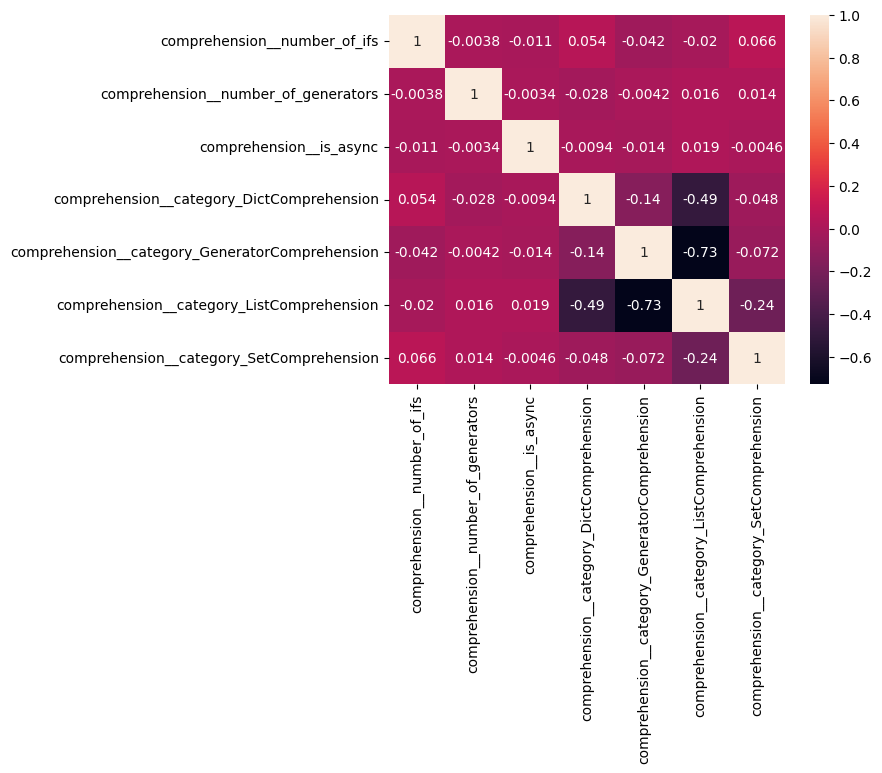

In [34]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variable (1 booleanas, 2 numericas y 1 categóricas) se hara un analisis detallado

### Variable is_async (1/4)
Esta variable es de tipo booleano y representa si la comprehension es asincrona. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='comprehension__is_async', ylabel='Count'>

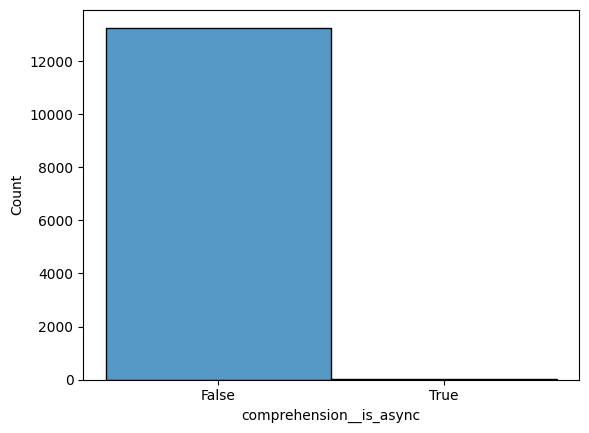

In [35]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['comprehension__is_async'], discrete=True)

In [36]:
num_true_values = len(X[X['comprehension__is_async'] == True])
num_false_values = len(X[X['comprehension__is_async'] == False])
std = X['comprehension__is_async'].std()
freq_true = len(X[X['comprehension__is_async'] == True]) / len(X['comprehension__is_async'])
freq_false = len(X[X['comprehension__is_async'] == False]) / len(X['comprehension__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 12 valores verdaderos y 13265 valores falsos. Y, la desviación típica es de 0.03005111962556839
La frecuencia con la que programa puede tener la variable is_async a True es 0.0009038186337274987.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9990961813662725.


In [37]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'comprehension__is_async', possible_values)

La variable comprehension__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable comprehension__is_async toma el valor de 0.0 en un 99.91% de los items.
La variable comprehension__is_async toma el valor de 1.0 en un 0.09038% de los items. [OUTLIER]


In [38]:
X[X['comprehension__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__category_DictComprehension,comprehension__category_GeneratorComprehension,comprehension__category_ListComprehension,comprehension__category_SetComprehension
count,12.0,12.0,12.0,12.0,12.0,12.0,12.0
mean,0.0,1.0,1.0,0.0,0.0,1.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1.0,1.0,0.0,0.0,1.0,0.0
25%,0.0,1.0,1.0,0.0,0.0,1.0,0.0
50%,0.0,1.0,1.0,0.0,0.0,1.0,0.0
75%,0.0,1.0,1.0,0.0,0.0,1.0,0.0
max,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### IMPORTANTE
El valor verdadero es outlier

### Variable number_of_ifs (2/4)
Esta variable representa el número de clausulas if en la comprehension. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. Con una media de 0.11.

<Axes: ylabel='comprehension__number_of_ifs'>

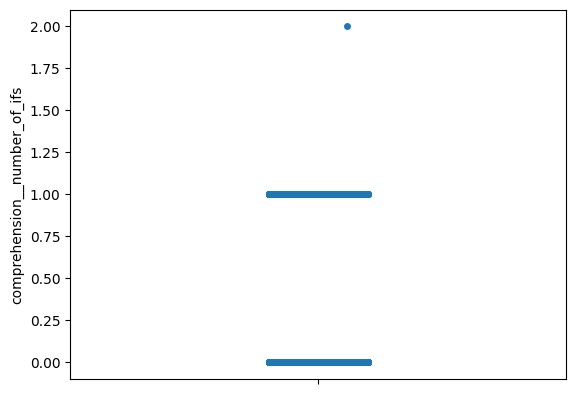

In [39]:
sns.stripplot(X['comprehension__number_of_ifs'])

In [40]:
print_outliers_for_df_column(X, 'comprehension__number_of_ifs')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7924238950812301
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para comprehension__number_of_ifs inferior a 0.0 (Q1-3*IQR) para comprehension__number_of_ifs. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para comprehension__number_of_ifs inferior a 0.0 (Q1-1.5*IQR) para comprehension__number_of_ifs. Representando un 0.0% del total de instancias.
+1.5IQR: 1511 instancias tienen un valor para comprehension__number_of_ifs superior a 0.0 (Q3+1.5*IQR) para comprehension__number_of_ifs. Representando un 11.38% del total de instancias.
+3.0IQR: 1511 instancias tienen un valor para comprehension__number_of_ifs superior a 0.0 (Q3-3*IQR) para comprehension__number_of_ifs. Representando un 11.38% del total de instancias.
L: 0 instancias tienen un valor

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [41]:
X[X['comprehension__number_of_ifs'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__category_DictComprehension,comprehension__category_GeneratorComprehension,comprehension__category_ListComprehension,comprehension__category_SetComprehension
count,1511.000000,1511.000000,1511.0,1511.000000,1511.000000,1511.000000,1511.000000
mean,1.000662,1.011251,0.0,0.130377,0.133024,0.685639,0.050960
std,0.025726,0.105506,0.0,0.336829,0.339714,0.464415,0.219988
min,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,2.000000,2.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_generators (3/4)
Esta variable representa el número generators presentes en la comprehension. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 4. Con una media de 1.013.

<Axes: ylabel='comprehension__number_of_generators'>

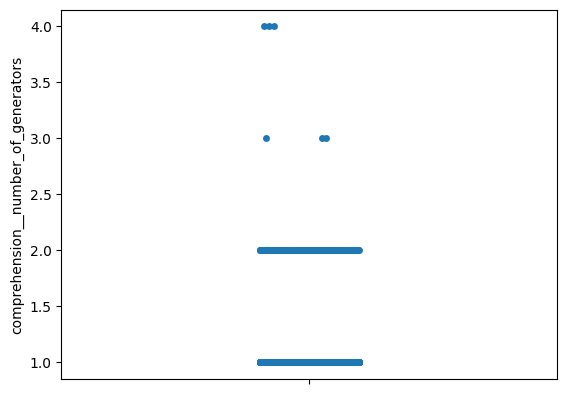

In [42]:
sns.stripplot(X['comprehension__number_of_generators'])

In [43]:
print_outliers_for_df_column(X, 'comprehension__number_of_generators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para comprehension__number_of_generators inferior a 1.0 (Q1-3*IQR) para comprehension__number_of_generators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para comprehension__number_of_generators inferior a 1.0 (Q1-1.5*IQR) para comprehension__number_of_generators. Representando un 0.0% del total de instancias.
+1.5IQR: 165 instancias tienen un valor para comprehension__number_of_generators superior a 1.0 (Q3+1.5*IQR) para comprehension__number_of_generators. Representando un 1.243% del total de instancias.
+3.0IQR: 165 instancias tienen un valor para comprehension__number_of_generators superior a 1.0 (Q3-3*IQR) para comprehension__number_of_generators. Representando un 1.243% del total de inst

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [44]:
X[X['comprehension__number_of_generators'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__category_DictComprehension,comprehension__category_GeneratorComprehension,comprehension__category_ListComprehension,comprehension__category_SetComprehension
count,165.000000,165.000000,165.0,165.000000,165.000000,165.000000,165.000000
mean,0.103030,2.054545,0.0,0.018182,0.163636,0.775758,0.042424
std,0.304924,0.297439,0.0,0.134015,0.371071,0.418352,0.202169
min,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.000000,2.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,4.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable category (4/4)
Esta variable es de tipo categórica y representa el tipo de comprehension.

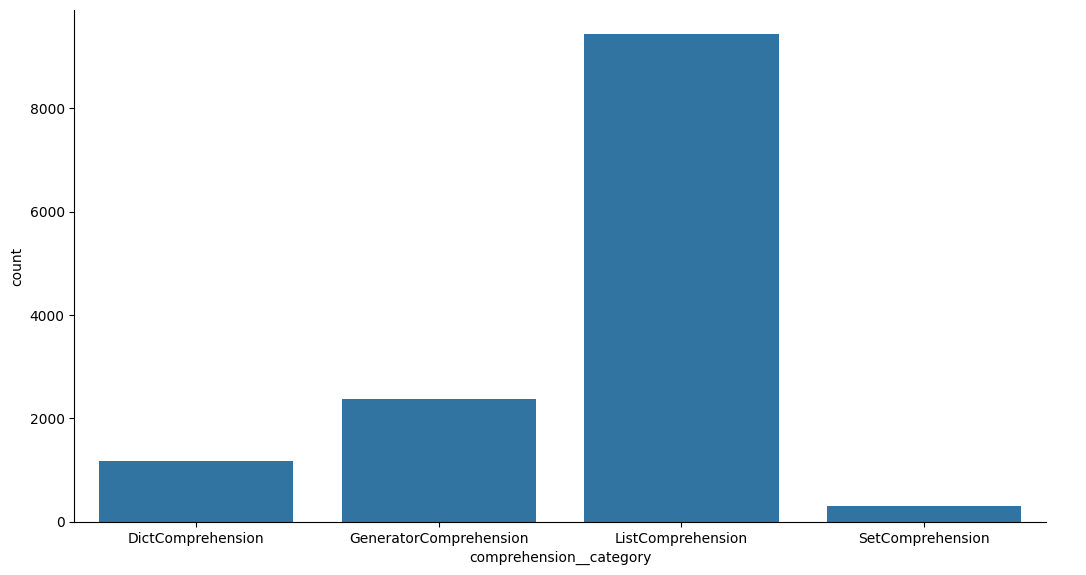

In [45]:
print_categorical_histogram(full_table, 'comprehension__category')

In [46]:
print_frequency_anal_for_cat_var(full_table, 'comprehension__category')

La variable comprehension__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable comprehension__category toma el valor de ListComprehension en un 71.07% de los items.
La variable comprehension__category toma el valor de GeneratorComprehension en un 17.8% de los items.
La variable comprehension__category toma el valor de DictComprehension en un 8.812% de los items.
La variable comprehension__category toma el valor de SetComprehension en un 2.32% de los items.


In [47]:
print_values_usage_for_cat_var(full_table, 'comprehension__category', COMPREHENSION_CATEGORY_VALUES)

La variable comprehension__category puede tomar 4 valores distintos
	4 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [48]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,comprehension__category,comprehension__number_of_ifs,comprehension__number_of_generators,comprehension__is_async,comprehension__expertise_level
6828,GeneratorComprehension,1,2,False,EXPERT
6901,GeneratorComprehension,1,2,False,EXPERT
7909,SetComprehension,1,2,False,EXPERT
10095,SetComprehension,1,2,False,EXPERT
11185,SetComprehension,1,2,False,EXPERT
14402,GeneratorComprehension,1,2,False,EXPERT


### IMPORTANTE
Revisar los 6 outliers detectados

In [49]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
comprehension__number_of_ifs,6.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
comprehension__number_of_generators,6.0,2.0,0.000000,2.0,2.0,2.0,2.0,2.0
comprehension__is_async,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
comprehension__category_DictComprehension,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
comprehension__category_GeneratorComprehension,6.0,0.5,0.547723,0.0,0.0,0.5,1.0,1.0
comprehension__category_ListComprehension,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
comprehension__category_SetComprehension,6.0,0.5,0.547723,0.0,0.0,0.5,1.0,1.0


In [50]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
comprehension__number_of_ifs,13271.0,0.113481,0.317429,0.0,0.0,0.0,0.0,2.0
comprehension__number_of_generators,13271.0,1.012659,0.119618,1.0,1.0,1.0,1.0,4.0
comprehension__is_async,13271.0,0.000904,0.030058,0.0,0.0,0.0,0.0,1.0
comprehension__category_DictComprehension,13271.0,0.088162,0.283541,0.0,0.0,0.0,0.0,1.0
comprehension__category_GeneratorComprehension,13271.0,0.177831,0.382385,0.0,0.0,0.0,0.0,1.0
comprehension__category_ListComprehension,13271.0,0.711024,0.453304,0.0,0.0,1.0,1.0,1.0
comprehension__category_SetComprehension,13271.0,0.022982,0.149853,0.0,0.0,0.0,0.0,1.0
